# Data Mining Project
# Kamran Shukurzade (309139)
# Burak Kaymakci (317054)

## Import libraries and datasets

In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import seaborn as sns

In [7]:
%%capture --no-display

df_adress=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerAddress',skiprows=1)
df_demog=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic',skiprows=1)
df_trans=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='Transactions',skiprows=1)
df_newcust=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='NewCustomerList',skiprows=1)

# Data Exploration

## Customer Address

In [8]:
df_adress.head()

customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

In [9]:
df_adress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [10]:
df_adress.describe()

customer_id     postcode  property_valuation
count  3999.000000  3999.000000         3999.000000
mean   2003.987997  2985.755939            7.514379
std    1154.576912   844.878364            2.824663
min       1.000000  2000.000000            1.000000
25%    1004.500000  2200.000000            6.000000
50%    2004.000000  2768.000000            8.000000
75%    3003.500000  3750.000000           10.000000
max    4003.000000  4883.000000           12.000000

In [11]:
df_adress['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [12]:
df_adress.loc[df_adress[df_adress['state']=='Victoria'].index,'state']='VIC'
df_adress.loc[df_adress[df_adress['state']=='New South Wales'].index,'state']='NSW'

In [13]:
df_adress[df_adress.duplicated(subset=["customer_id"])]

Empty DataFrame
Columns: [customer_id, address, postcode, state, country, property_valuation]
Index: []

## Customer Demographics

In [14]:
df_demog.head()

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property      Mass Customer                  N   
3                    IT      Mass Customer                  N   
4                   NaN  Affluent Customer                  N   

                                             default owns_car  tenure  
0                                                 "'      Yes    11.0  
1                       <script>alert('hi')</script>      Yes    16.0  
2                                2018-02-01 00:00:00      Yes    15.0  
3  () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0  
4                                                NIL      Yes     8.0

In [15]:
df_demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [16]:
df_demog.describe()

customer_id  past_3_years_bike_related_purchases       tenure
count  4000.000000                          4000.000000  3913.000000
mean   2000.500000                            48.890000    10.657041
std    1154.844867                            28.715005     5.660146
min       1.000000                             0.000000     1.000000
25%    1000.750000                            24.000000     6.000000
50%    2000.500000                            48.000000    11.000000
75%    3000.250000                            73.000000    15.000000
max    4000.000000                            99.000000    22.000000

In [17]:
set(df_demog['customer_id']).symmetric_difference(set(df_adress['customer_id']))

{3, 10, 22, 23, 4001, 4002, 4003}

In [18]:
df_demog['DOB'].describe(datetime_is_numeric=True)

count                          3913
mean     1977-07-12 23:56:41.277792
min             1843-12-21 00:00:00
25%             1968-01-22 00:00:00
50%             1977-07-22 00:00:00
75%             1987-02-28 00:00:00
max             2002-03-11 00:00:00
Name: DOB, dtype: object

In [19]:
df_demog[df_demog['DOB'].dt.year<=1930]

customer_id first_name last_name gender  \
33           34   Jephthah  Bachmann      U   

    past_3_years_bike_related_purchases        DOB        job_title  \
33                                   59 1843-12-21  Legal Assistant   

   job_industry_category     wealth_segment deceased_indicator default  \
33                    IT  Affluent Customer                  N     NaN   

   owns_car  tenure  
33       No    20.0

In [20]:
df_demog.loc[df_demog[df_demog['DOB'].dt.year<=1930].index,'DOB']=np.nan

In [21]:
print(df_demog['gender'].unique())
print(df_demog['wealth_segment'].unique())
print(df_demog['deceased_indicator'].value_counts())
print(df_demog['owns_car'].value_counts())

['F' 'Male' 'Female' 'U' 'Femal' 'M']
['Mass Customer' 'Affluent Customer' 'High Net Worth']
N    3998
Y       2
Name: deceased_indicator, dtype: int64
Yes    2024
No     1976
Name: owns_car, dtype: int64


In [22]:
df_demog.loc[df_demog[df_demog['gender']=='F'].index,'gender']='Female'
df_demog.loc[df_demog[df_demog['gender']=='Femal'].index,'gender']='Female'
df_demog.loc[df_demog[df_demog['gender']=='M'].index,'gender']='Male'

In [23]:
df_demog[df_demog.duplicated(subset=["customer_id"])]

Empty DataFrame
Columns: [customer_id, first_name, last_name, gender, past_3_years_bike_related_purchases, DOB, job_title, job_industry_category, wealth_segment, deceased_indicator, default, owns_car, tenure]
Index: []

## Customer transactions

In [24]:
df_trans.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost product_first_sold_date  
0       71.49          53.62     2012-12-02 00:00:00  
1     2091.47         388.92     2014-03-03 00:00:00  
2     1793.43         248.82     1999-07-20 00:00:00  
3     1198.46         381.10     1998-12-16 00:00:00  
4     1765.30         709.48     2015-08-10 00:00:00

In [25]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [26]:
df_trans.describe()

transaction_id   product_id   customer_id  online_order    list_price  \
count    20000.000000  20000.00000  20000.000000  19640.000000  20000.000000   
mean     10000.500000     45.36465   1738.246050      0.500458   1107.829449   
std       5773.647028     30.75359   1011.951046      0.500013    582.825242   
min          1.000000      0.00000      1.000000      0.000000     12.010000   
25%       5000.750000     18.00000    857.750000      0.000000    575.270000   
50%      10000.500000     44.00000   1736.000000      1.000000   1163.890000   
75%      15000.250000     72.00000   2613.000000      1.000000   1635.300000   
max      20000.000000    100.00000   5034.000000      1.000000   2091.470000   

       standard_cost  
count   19803.000000  
mean      556.046951  
std       405.955660  
min         7.210000  
25%       215.140000  
50%       507.580000  
75%       795.100000  
max      1759.850000

In [27]:
len(set(df_demog['customer_id']).symmetric_difference(set(df_trans['customer_id'])))

508

In [28]:
df_trans[df_trans['customer_id']>=4000]

transaction_id  product_id  customer_id transaction_date  online_order  \
8707             8708           0         5034       2017-10-07           0.0   
16700           16701           0         5034       2017-01-27           0.0   
17468           17469           0         5034       2017-01-03           0.0   

      order_status           brand product_line product_class product_size  \
8707      Approved           Solex         Road        medium       medium   
16700     Approved  Norco Bicycles     Standard        medium       medium   
17468     Approved      OHM Cycles         Road        medium       medium   

       list_price  standard_cost product_first_sold_date  
8707       416.98     312.735016                   42218  
16700      360.40     270.299988                   35667  
17468      742.54     667.400024                   33879

In [29]:
print(df_trans['order_status'].unique())
print(df_trans['brand'].unique())
print(df_trans['product_line'].unique())
print(df_trans['product_class'].unique())
print(df_trans['product_size'].unique())

['Approved' 'Cancelled']
['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
['Standard' 'Road' 'Mountain' 'Touring' nan]
['medium' 'low' 'high' nan]
['medium' 'large' 'small' nan]


In [30]:
df_trans[df_trans.duplicated(subset=["transaction_id","product_id","customer_id"])]

Empty DataFrame
Columns: [transaction_id, product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, list_price, standard_cost, product_first_sold_date]
Index: []

## New customer dataset

In [31]:
df_newcust.head()

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

         DOB                   job_title job_industry_category  \
0 1957-07-12             General Manager         Manufacturing   
1 1970-03-22         Structural Engineer              Property   
2 1974-08-28      Senior Cost Accountant    Financial Services   
3 1979-01-28  Account Representative III         Manufacturing   
4 1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  ...    country  \
0      Mass Customer                  N      Yes  ...  Australia   
1      Mass Customer                  N       No  ...  Australia   
2  Affluent Customer                  N       No  ...  Australia   
3  Affluent Customer                  N      Yes  ...  Australia   
4  Affluent Customer                  N       No  ...  Australia   

  property_valuation  online_order Unnamed: 17 Unnamed: 18  Unnamed: 19  \
0                  6             5        0.88      1.1000       1.3750   
1                 11             7        0.57      0.5700       0.7125   
2                  5             6        1.06      1.0600       1.0600   
3                  1             5        1.01      1.2625       1.2625   
4                  9             6        1.03      1.0300       1.2875   

   Unnamed: 20  Unnamed: 21  Rank     Value  
0     1.168750            1     1  1.718750  
1     0.605625            1     1  1.718750  
2     1.060000            1     1  1.718750  
3     1.262500            4     4  1.703125  
4     1.287500            4     4  1.703125  

[5 rows x 24 columns]

In [32]:
df_newcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [33]:
df_newcust.drop(['Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21'],axis=1,inplace=True)

In [34]:
df_newcust.describe()

past_3_years_bike_related_purchases       tenure     postcode  \
count                          1000.000000  1000.000000  1000.000000   
mean                             49.836000    11.388000  3019.227000   
std                              27.796686     5.037145   848.895767   
min                               0.000000     0.000000  2000.000000   
25%                              26.750000     7.000000  2209.000000   
50%                              51.000000    11.000000  2800.000000   
75%                              72.000000    15.000000  3845.500000   
max                              99.000000    22.000000  4879.000000   

       property_valuation  online_order         Rank        Value  
count         1000.000000   1000.000000  1000.000000  1000.000000  
mean             7.397000      4.215000   498.819000     0.881714  
std              2.758804      2.576318   288.810997     0.293525  
min              1.000000      0.000000     1.000000     0.340000  
25%              6.000000      2.000000   250.000000     0.649531  
50%              8.000000      4.000000   500.000000     0.860000  
75%              9.000000      6.000000   750.250000     1.075000  
max             12.000000      9.000000  1000.000000     1.718750

In [35]:
df_newcust['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [36]:
df_newcust['DOB'].describe(datetime_is_numeric=True)

count                              983
mean     1971-04-20 14:05:14.954221768
min                1938-06-08 00:00:00
25%                1957-10-09 00:00:00
50%                1972-03-24 00:00:00
75%                1983-04-12 12:00:00
max                2002-02-27 00:00:00
Name: DOB, dtype: object

In [37]:
print(df_newcust['gender'].value_counts())
print(df_newcust['wealth_segment'].unique())
print(df_newcust['deceased_indicator'].value_counts())
print(df_newcust['owns_car'].value_counts())

Female    513
Male      470
U          17
Name: gender, dtype: int64
['Mass Customer' 'Affluent Customer' 'High Net Worth']
N    1000
Name: deceased_indicator, dtype: int64
No     507
Yes    493
Name: owns_car, dtype: int64


## Feature engineering

In [38]:
# This function converts given date to age
from datetime import date

def age(born):
    
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

In [39]:
# This function converts given age to group
def age_group(df_demog):
    
    df_demog['Age'] = df_demog['DOB'].apply(age)
    df_demog['Age group']=''
    df_demog.loc[df_demog[(df_demog['Age']>18)&(df_demog['Age']<25)].index,'Age group']=1
    df_demog.loc[df_demog[(df_demog['Age']>=25)&(df_demog['Age']<=34)].index,'Age group']=2
    df_demog.loc[df_demog[(df_demog['Age']>=35)&(df_demog['Age']<=44)].index,'Age group']=3
    df_demog.loc[df_demog[(df_demog['Age']>=45)&(df_demog['Age']<=54)].index,'Age group']=4
    df_demog.loc[df_demog[(df_demog['Age']>=55)&(df_demog['Age']<=64)].index,'Age group']=5
    df_demog.loc[df_demog[(df_demog['Age']>=65)&(df_demog['Age']<=74)].index,'Age group']=6
    df_demog.loc[df_demog[(df_demog['Age']>74)].index,'Age group']=7
    
    return df_demog['Age'], df_demog['Age group']

In [40]:
df_demog['Age']=age_group(df_demog)[0]
df_demog['Age group']=age_group(df_demog)[1]
df_newcust['Age']=age_group(df_newcust)[0]
df_newcust['Age group']=age_group(df_newcust)[1]

#Gender converted to binary attribute(1,0)
gender_map = {'Male': 1, 'Female': 0}
df_demog['gender_binary'] = df_demog['gender'].map(gender_map)
df_newcust['gender_binary'] = df_newcust['gender'].map(gender_map)

#Owns_car converted to binary attribute(1,0)
ownscar_map = {'Yes': 1, 'No': 0}
df_demog['ownscar_binary'] = df_demog['owns_car'].map(ownscar_map)
df_newcust['ownscar_binary'] = df_newcust['owns_car'].map(ownscar_map)

#Continous property valuation attribute converted to ordinal attribute based on quantiles
df_adress['property_valuation_group']=pd.qcut(df_adress['property_valuation'], 4,labels=[1,2,3,4])
df_newcust['property_valuation_group']=pd.qcut(df_newcust['property_valuation'], 4,labels=[1,2,3,4])

#Continous past 3 years purchase attribute converted to ordinal attribute based on quantiles
df_demog['past purchase group']=pd.qcut(df_demog['past_3_years_bike_related_purchases'], 4,labels=[1,2,3,4])
df_newcust['past purchase group']=pd.qcut(df_newcust['past_3_years_bike_related_purchases'], 4,labels=[1,2,3,4])

#3 new features were added to summarize customer transactions in terms of profit, frequency and recency
df_trans['Profit']=df_trans['list_price']-df_trans['standard_cost']
df_trans['Recency']=df_trans['transaction_date'].max()-df_trans['transaction_date']
df_trans['Recency']=df_trans['Recency'].dt.days
df_trans['Count']=1

df_trans_newf=df_trans.groupby(['customer_id']).sum()[['online_order','Profit','Count']]
df_trans_newf.reset_index(inplace=True)

df_trans_rec=df_trans.groupby(['customer_id'])['Recency'].min()
df_trans_rec=df_trans_rec.reset_index()

### Combining all datasets based on "customer_id" key

In [41]:
df_all=pd.merge(df_trans_newf,df_demog,how='outer',on='customer_id')
df_all=pd.merge(df_all,df_trans_rec,how='outer',on='customer_id')
df_all=pd.merge(df_all,df_adress,how='outer',on='customer_id')
df_all=df_all.sort_values('customer_id')
df_all

customer_id  online_order       Profit  Count      first_name  \
0               1           6.0  3018.090000   11.0         Laraine   
1               2           1.0  2226.260000    3.0             Eli   
2               3           1.0  3362.810000    8.0           Arlin   
3               4           1.0   220.570000    2.0          Talbot   
4               5           2.0  2394.940000    6.0  Sheila-kathryn   
...           ...           ...          ...    ...             ...   
4000         4000           NaN          NaN    NaN           Kippy   
4001         4001           NaN          NaN    NaN             NaN   
4002         4002           NaN          NaN    NaN             NaN   
4003         4003           NaN          NaN    NaN             NaN   
3493         5034           0.0   269.484972    3.0             NaN   

      last_name  gender  past_3_years_bike_related_purchases        DOB  \
0     Medendorp  Female                                 93.0 1953-10-12   
1       Bockman    Male                                 81.0 1980-12-16   
2        Dearle    Male                                 61.0 1954-01-20   
3           NaN    Male                                 33.0 1961-10-03   
4        Calton  Female                                 56.0 1977-05-13   
...         ...     ...                                  ...        ...   
4000    Oldland    Male                                 76.0 1991-11-05   
4001        NaN     NaN                                  NaN        NaT   
4002        NaN     NaN                                  NaN        NaT   
4003        NaN     NaN                                  NaN        NaT   
3493        NaN     NaN                                  NaN        NaT   

                   job_title  ... gender_binary ownscar_binary  \
0        Executive Secretary  ...           0.0            1.0   
1     Administrative Officer  ...           1.0            1.0   
2         Recruiting Manager  ...           1.0            1.0   
3                        NaN  ...           1.0            0.0   
4              Senior Editor  ...           0.0            1.0   
...                      ...  ...           ...            ...   
4000    Software Engineer IV  ...           1.0            0.0   
4001                     NaN  ...           NaN            NaN   
4002                     NaN  ...           NaN            NaN   
4003                     NaN  ...           NaN            NaN   
3493                     NaN  ...           NaN            NaN   

     past purchase group Recency                    address  postcode  state  \
0                      4     7.0         060 Morning Avenue    2016.0    NSW   
1                      4   128.0        6 Meadow Vale Court    2153.0    NSW   
2                      3   102.0                        NaN       NaN    NaN   
3                      2   195.0         0 Holy Cross Court    4211.0    QLD   
4                      3    16.0        17979 Del Mar Point    2448.0    NSW   
...                  ...     ...                        ...       ...    ...   
4000                   4     NaN  57042 Village Green Point    4511.0    QLD   
4001                 NaN     NaN     87 Crescent Oaks Alley    2756.0    NSW   
4002                 NaN     NaN           8194 Lien Street    4032.0    QLD   
4003                 NaN     NaN            320 Acker Drive    2251.0    NSW   
3493                 NaN    84.0                        NaN       NaN    NaN   

        country  property_valuation  property_valuation_group  
0     Australia                10.0                         3  
1     Australia                10.0                         3  
2           NaN                 NaN                       NaN  
3     Australia                 9.0                         3  
4     Australia                 4.0                         1  
...         ...                 ...                       ...  
4000  Australia                 6.0               

In [42]:
df_all.describe()

customer_id  online_order        Profit        Count  \
count  4004.000000   3494.000000   3494.000000  3494.000000   
mean   2002.757243      2.813108   3128.301078     5.724098   
std    1156.559536      1.649416   1770.536034     2.325873   
min       1.000000      0.000000     15.080000     1.000000   
25%    1001.750000      2.000000   1841.370000     4.000000   
50%    2002.500000      3.000000   2861.980000     6.000000   
75%    3003.250000      4.000000   4183.107500     7.000000   
max    5034.000000      9.000000  11668.950000    14.000000   

       past_3_years_bike_related_purchases       tenure          Age  \
count                          4000.000000  3913.000000  3912.000000   
mean                             48.890000    10.657041    43.893661   
std                              28.715005     5.660146    12.616866   
min                               0.000000     1.000000    19.000000   
25%                              24.000000     6.000000    34.000000   
50%                              48.000000    11.000000    44.000000   
75%                              73.000000    15.000000    53.000000   
max                              99.000000    22.000000    90.000000   

       gender_binary  ownscar_binary      Recency     postcode  \
count    3912.000000     4000.000000  3494.000000  3999.000000   
mean        0.478783        0.506000    60.813681  2985.755939   
std         0.499614        0.500027    57.787120   844.878364   
min         0.000000        0.000000     0.000000  2000.000000   
25%         0.000000        0.000000    17.000000  2200.000000   
50%         0.000000        1.000000    44.000000  2768.000000   
75%         1.000000        1.000000    85.000000  3750.000000   
max         1.000000        1.000000   353.000000  4883.000000   

       property_valuation  
count         3999.000000  
mean             7.514379  
std              2.824663  
min              1.000000  
25%              6.000000  
50%              8.000000  
75%             10.000000  
max             12.000000

## Data visualization

In [43]:
parameters = {'axes.labelsize': 22,'axes.titlesize': 20,'xtick.labelsize':20,'font.size': 20}
plt.rcParams.update(parameters)

In [44]:
def countplot(df,n_row,n_col):
    f, axes = plt.subplots(n_row,n_col,figsize=(20,10))

    sns.countplot(df["gender"],ax=axes[0,0])
    sns.countplot(df["state"],ax=axes[0,1])
    sns.countplot(df["wealth_segment"],ax=axes[1,0])
    sns.countplot(df["owns_car"],ax=axes[1,1])

    plt.tight_layout()

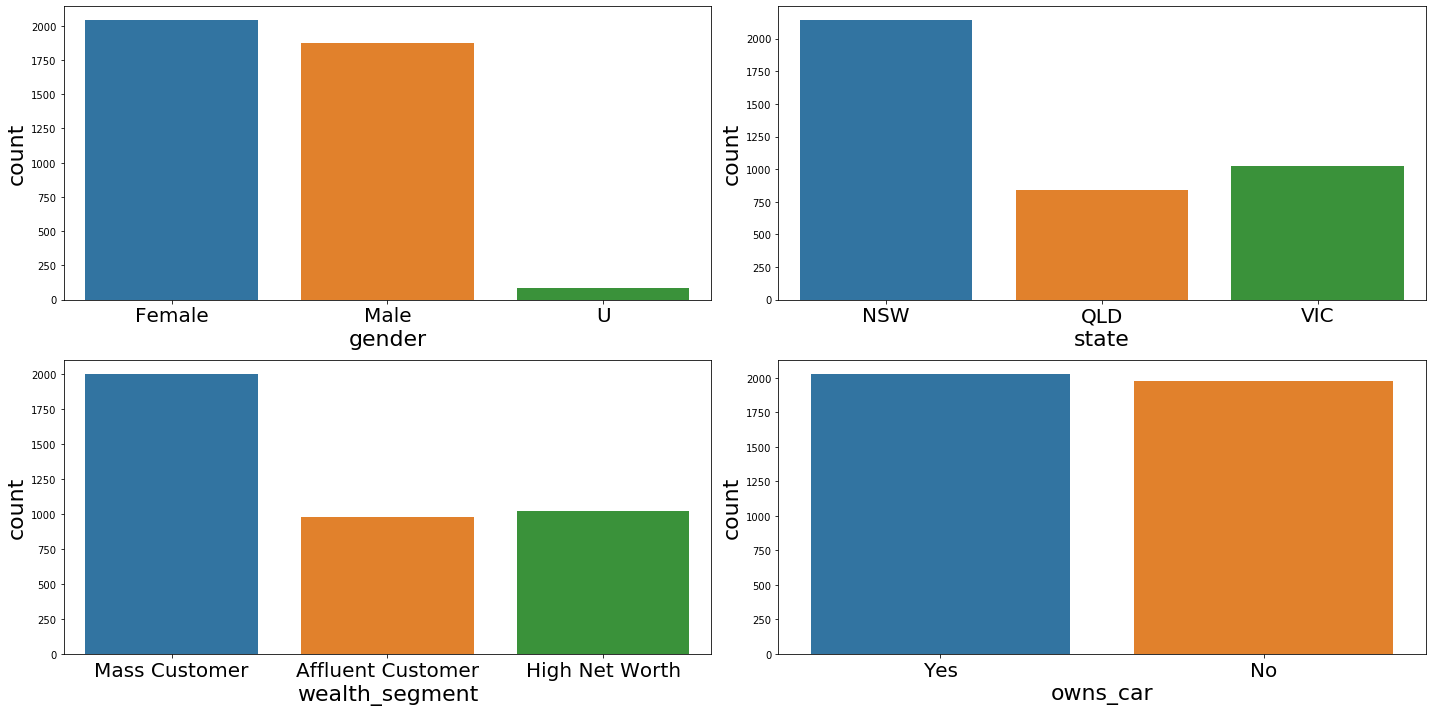

In [46]:
%%capture --no-display
%matplotlib inline

countplot(df_all,2,2)

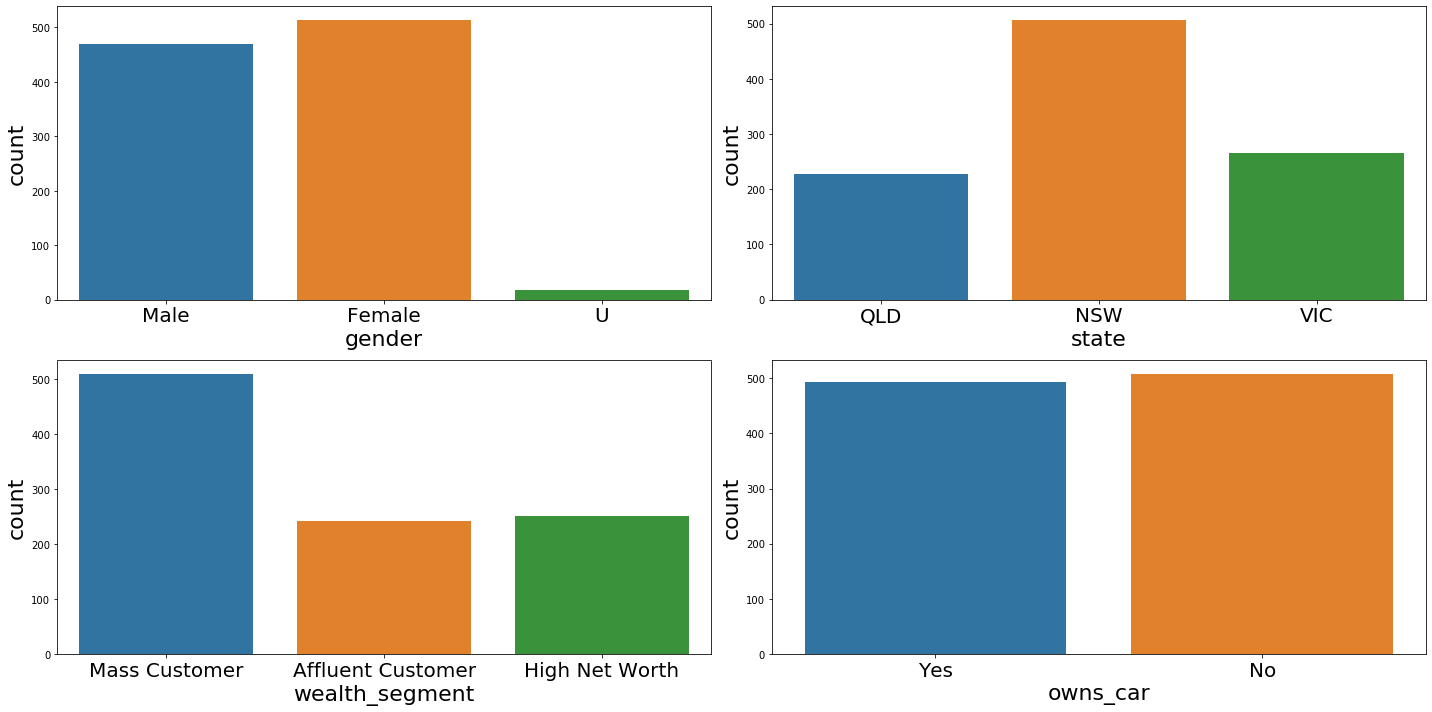

In [47]:
%%capture --no-display
%matplotlib inline

countplot(df_newcust,2,2)

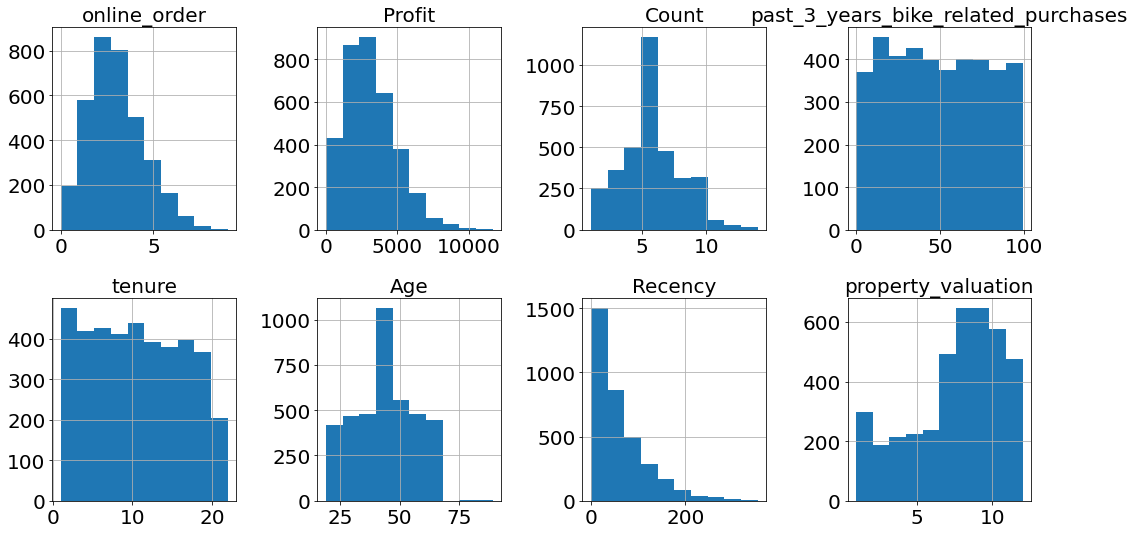

In [42]:
df_all[['online_order','Profit','Count','past_3_years_bike_related_purchases','tenure','Age'
       ,'Recency','property_valuation']].hist(figsize=[15,15],layout=[4,4])
plt.tight_layout()

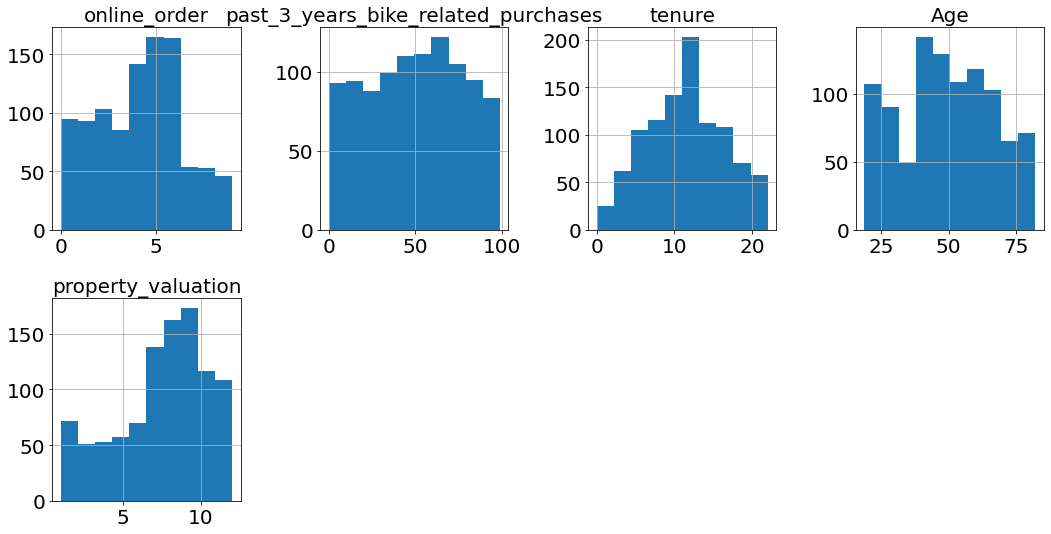

In [43]:
df_newcust[['online_order','past_3_years_bike_related_purchases','tenure','Age',
            'property_valuation']].hist(figsize=[15,15],layout=[4,4])
plt.tight_layout()

In [44]:
df_all.skew()

customer_id                            0.002538
online_order                           0.548081
Profit                                 0.776112
Count                                  0.423765
past_3_years_bike_related_purchases    0.045286
tenure                                 0.063799
Age                                    0.006387
gender_binary                          0.084976
ownscar_binary                        -0.024011
Recency                                1.570874
postcode                               0.625983
property_valuation                    -0.631451
dtype: float64

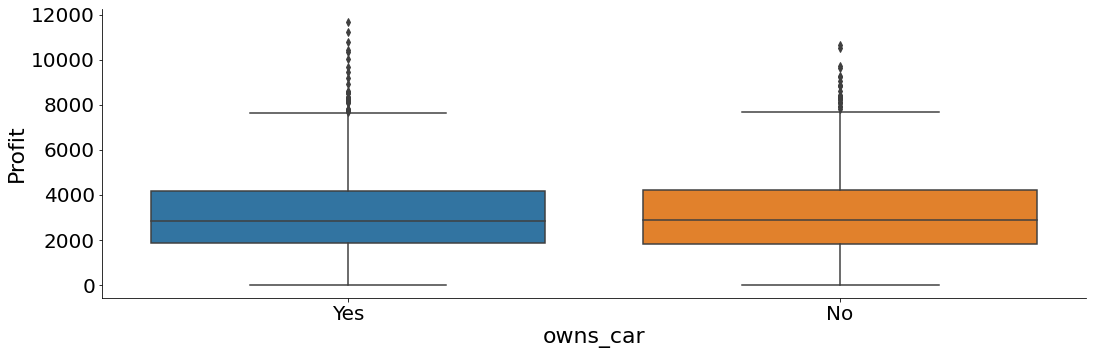

In [45]:
ax=sns.catplot(x="owns_car", y="Profit", kind="box", data=df_all)
ax.fig.set_figwidth(20)
ax.fig.set_figheight(5)

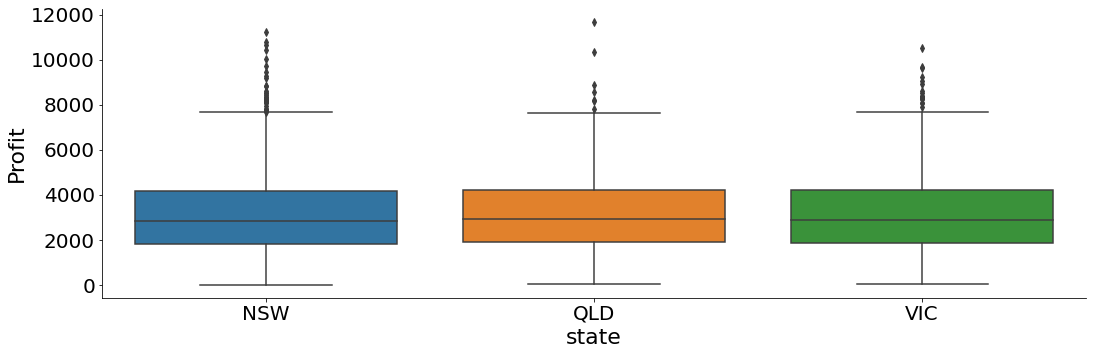

In [46]:
ax=sns.catplot(x="state", y="Profit", kind="box", data=df_all)
ax.fig.set_figwidth(20)
ax.fig.set_figheight(5)

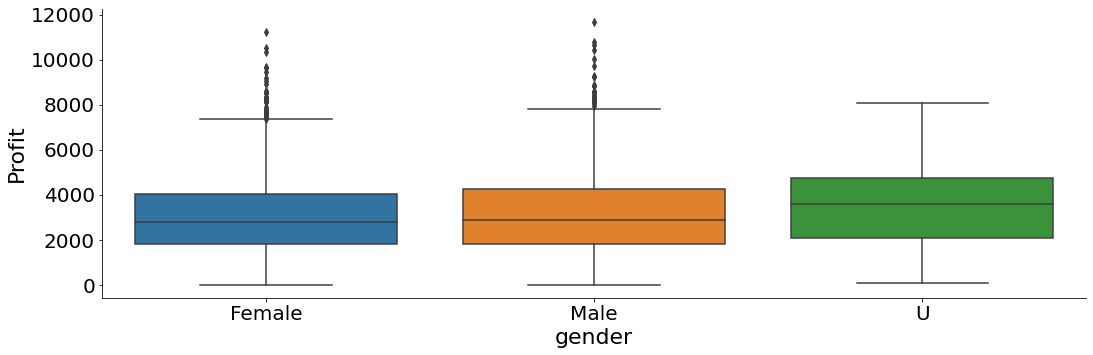

In [47]:
ax=sns.catplot(x="gender", y="Profit", kind="box", data=df_all)
ax.fig.set_figwidth(20)
ax.fig.set_figheight(5)

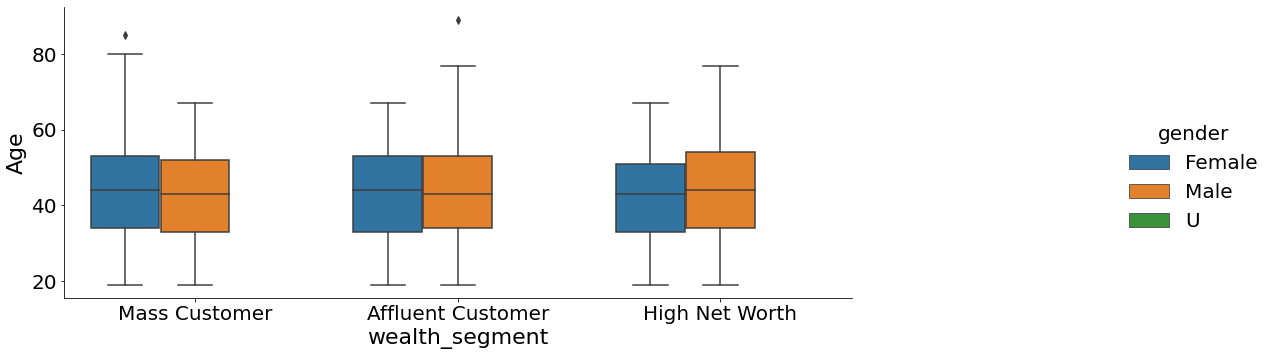

In [48]:
ax=sns.catplot(x="wealth_segment", y="Age", hue="gender", kind="box", data=df_all)
ax.fig.set_figwidth(20)
ax.fig.set_figheight(5)

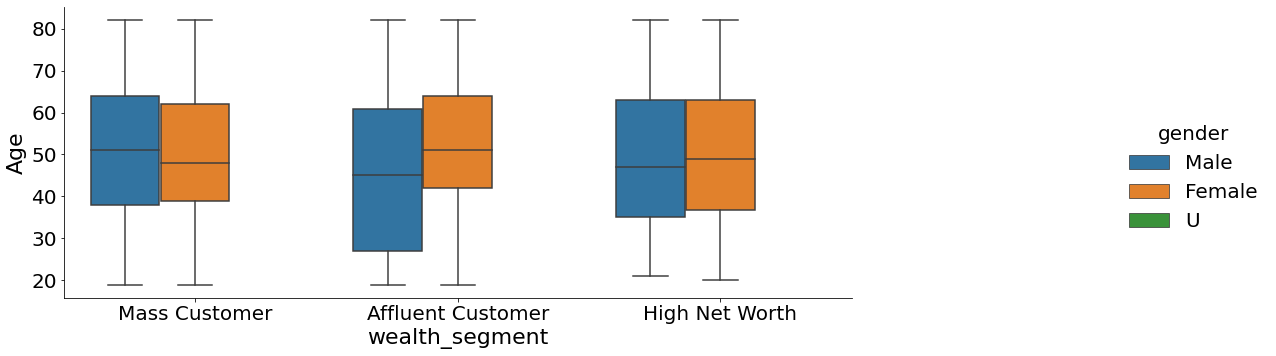

In [49]:
ax=sns.catplot(x="wealth_segment", y="Age", hue="gender", kind="box", data=df_newcust)
ax.fig.set_figwidth(20)
ax.fig.set_figheight(5)

### Feature space was reduced for analysis

In [50]:
features=['customer_id','state','property_valuation_group','gender_binary','wealth_segment','ownscar_binary',
          'Age group','past purchase group','online_order','Profit','Recency','Count']

In [51]:
df_f=df_all[features]
df_f

customer_id state property_valuation_group  gender_binary  \
0               1   NSW                        3            0.0   
1               2   NSW                        3            1.0   
2               3   NaN                      NaN            1.0   
3               4   QLD                        3            1.0   
4               5   NSW                        1            0.0   
...           ...   ...                      ...            ...   
4000         4000   QLD                        1            1.0   
4001         4001   NSW                        3            NaN   
4002         4002   QLD                        2            NaN   
4003         4003   NSW                        2            NaN   
3493         5034   NaN                      NaN            NaN   

         wealth_segment  ownscar_binary Age group past purchase group  \
0         Mass Customer             1.0         6                   4   
1         Mass Customer             1.0         3                   4   
2         Mass Customer             1.0         6                   3   
3         Mass Customer             0.0         5                   2   
4     Affluent Customer             1.0         3                   3   
...                 ...             ...       ...                 ...   
4000  Affluent Customer             0.0         2                   4   
4001                NaN             NaN       NaN                 NaN   
4002                NaN             NaN       NaN                 NaN   
4003                NaN             NaN       NaN                 NaN   
3493                NaN             NaN       NaN                 NaN   

      online_order       Profit  Recency  Count  
0              6.0  3018.090000      7.0   11.0  
1              1.0  2226.260000    128.0    3.0  
2              1.0  3362.810000    102.0    8.0  
3              1.0   220.570000    195.0    2.0  
4              2.0  2394.940000     16.0    6.0  
...            ...          ...      ...    ...  
4000           NaN          NaN      NaN    NaN  
4001           NaN          NaN      NaN    NaN  
4002           NaN          NaN      NaN    NaN  
4003           NaN          NaN      NaN    NaN  
3493           0.0   269.484972     84.0    3.0  

[4004 rows x 12 columns]

## Removing rows with missing values

In [52]:
df_analysis=df_f.dropna()
df_analysis.reset_index(drop=True,inplace=True)
df_analysis.describe()

customer_id  gender_binary  ownscar_binary  online_order        Profit  \
count  3412.000000    3412.000000     3412.000000   3412.000000   3412.000000   
mean   1751.154748       0.484760        0.504982      2.809789   3119.383406   
std    1009.235853       0.499841        0.500048      1.643511   1770.750531   
min       1.000000       0.000000        0.000000      0.000000     15.080000   
25%     877.750000       0.000000        0.000000      2.000000   1833.895000   
50%    1750.500000       0.000000        1.000000      3.000000   2847.585000   
75%    2623.250000       1.000000        1.000000      4.000000   4165.615000   
max    3500.000000       1.000000        1.000000      9.000000  11668.950000   

           Recency        Count  
count  3412.000000  3412.000000  
mean     61.095252     5.718933  
std      57.948880     2.324424  
min       0.000000     1.000000  
25%      18.000000     4.000000  
50%      44.000000     6.000000  
75%      85.000000     7.000000  
max     353.000000    14.000000

In [53]:
df_newcust[df_newcust['gender']=='U']['gender']=np.nan
df_newcust=df_newcust.dropna()
df_newcust.reset_index(drop=True,inplace=True)
df_newcust.describe()

<ipython-input-53-97d0b33c6b40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newcust[df_newcust['gender']=='U']['gender']=np.nan


past_3_years_bike_related_purchases      tenure     postcode  \
count                           715.000000  715.000000   715.000000   
mean                             49.806993   11.349650  3033.420979   
std                              27.735227    5.011274   851.685794   
min                               0.000000    1.000000  2000.000000   
25%                              27.000000    7.000000  2212.500000   
50%                              51.000000   11.000000  3013.000000   
75%                              71.500000   15.000000  3855.000000   
max                              99.000000   22.000000  4879.000000   

       property_valuation  online_order         Rank       Value         Age  \
count          715.000000    715.000000   715.000000  715.000000  715.000000   
mean             7.386014      4.155245   507.942657    0.873785   49.008392   
std              2.830274      2.419508   290.855597    0.296971   17.031522   
min              1.000000      0.000000     1.000000    0.340000   19.000000   
25%              6.000000      2.000000   252.000000    0.637500   36.000000   
50%              8.000000      4.000000   524.000000    0.836719   48.000000   
75%              9.000000      6.000000   760.000000    1.073125   63.000000   
max             12.000000      9.000000  1000.000000    1.718750   82.000000   

       gender_binary  ownscar_binary  
count     715.000000      715.000000  
mean        0.483916        0.488112  
std         0.500091        0.500209  
min         0.000000        0.000000  
25%         0.000000        0.000000  
50%         0.000000        0.000000  
75%         1.000000        1.000000  
max         1.000000        1.000000

## Clustering

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_cluster=df_analysis[['Profit','Recency','Count']]

df_cluster['Recency']=-1*df_cluster['Recency']

X=df_cluster
X = StandardScaler().fit_transform(X)

<ipython-input-55-ecc647e2b1cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Recency']=-1*df_cluster['Recency']


In [56]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [57]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.5263898390908774
2 : 1.1991207408547113
3 : 1.015370317707138
4 : 0.9176163215879125
5 : 0.8515273632646247
6 : 0.7986360975860198
7 : 0.7654937224256986
8 : 0.7307767081803423
9 : 0.7040799719145769


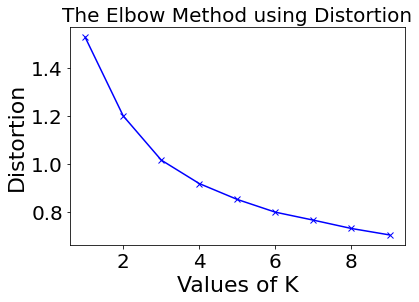

In [58]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [59]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [60]:
idx = np.argsort(kmeans.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(3)

In [61]:
df_cluster=pd.concat([df_analysis,pd.DataFrame({'Cluster number':lut[kmeans.labels_]})],axis=1)
df_cluster

customer_id state property_valuation_group  gender_binary  \
0               1   NSW                        3            0.0   
1               2   NSW                        3            1.0   
2               4   QLD                        3            1.0   
3               5   NSW                        1            0.0   
4               6   VIC                        3            1.0   
...           ...   ...                      ...            ...   
3407         3496   NSW                        3            1.0   
3408         3497   VIC                        1            0.0   
3409         3498   VIC                        1            0.0   
3410         3499   QLD                        3            1.0   
3411         3500   NSW                        3            0.0   

         wealth_segment  ownscar_binary Age group past purchase group  \
0         Mass Customer             1.0         6                   4   
1         Mass Customer             1.0         3                   4   
2         Mass Customer             0.0         5                   2   
3     Affluent Customer             1.0         3                   3   
4        High Net Worth             1.0         4                   2   
...                 ...             ...       ...                 ...   
3407      Mass Customer             1.0         3                   4   
3408  Affluent Customer             1.0         3                   3   
3409      Mass Customer             0.0         2                   2   
3410      Mass Customer             1.0         3                   2   
3411  Affluent Customer             0.0         4                   3   

      online_order   Profit  Recency  Count  Cluster number  
0              6.0  3018.09      7.0   11.0               2  
1              1.0  2226.26    128.0    3.0               0  
2              1.0   220.57    195.0    2.0               0  
3              2.0  2394.94     16.0    6.0               1  
4              2.0  3946.55     64.0    5.0               1  
...            ...      ...      ...    ...             ...  
3407           3.0  2045.84    256.0    4.0               0  
3408           2.0  1648.32     52.0    3.0               1  
3409           5.0  3147.33    127.0    6.0               0  
3410           4.0  4955.25     51.0    7.0               2  
3411           2.0  1785.86    144.0    6.0               0  

[3412 rows x 13 columns]

Text(0, 0.5, 'Feature 1')

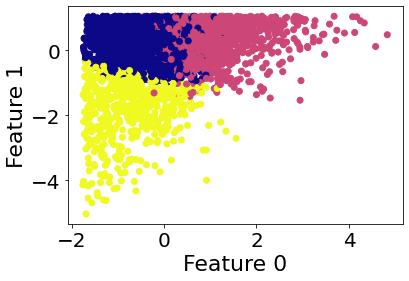

In [62]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2], 
            s=100, 
            linewidth=2,
            cmap="plasma")

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<Figure size 720x576 with 0 Axes>

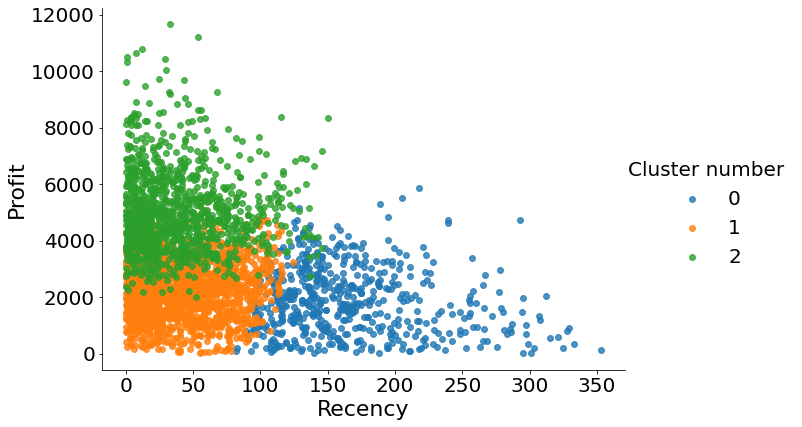

In [63]:
# parameters = {'axes.labelsize': 20,'axes.titlesize': 20,'xtick.labelsize':20,'font.size': 16}
# plt.rcParams.update(parameters)
plt.figure(figsize=(10, 8))
facet = sns.lmplot(data=df_cluster, x='Recency', y='Profit', hue='Cluster number', 
                   fit_reg=False, legend=True, legend_out=True,height=6, aspect=1.5,scatter_kws={"s": 35})

In [64]:
df_analysis=df_cluster

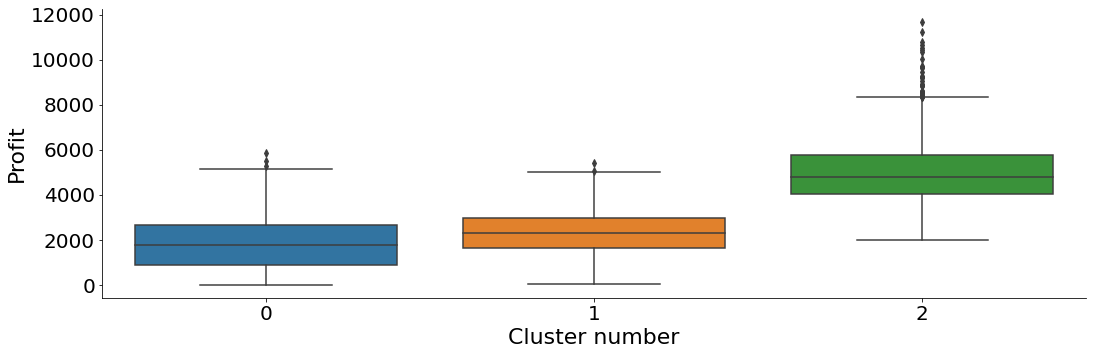

In [65]:
ax=sns.catplot(x="Cluster number", y="Profit", kind="box", data=df_analysis)
ax.fig.set_figwidth(20)
ax.fig.set_figheight(5)

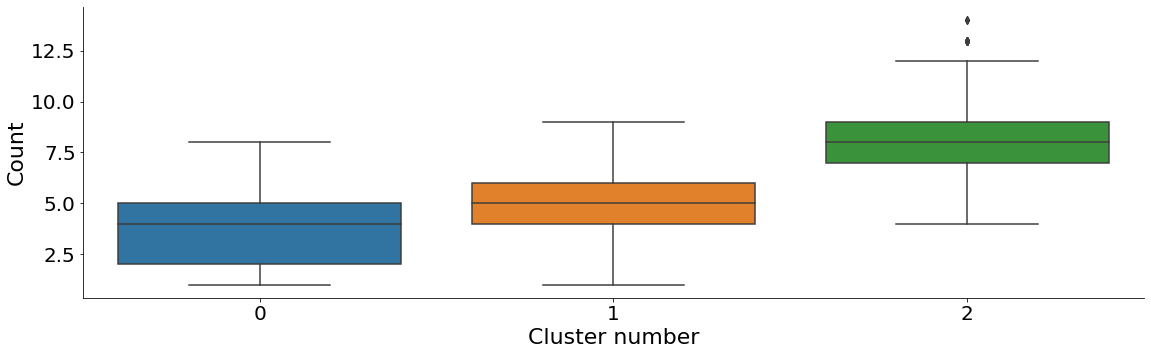

In [66]:
ax=sns.catplot(x="Cluster number", y="Count", kind="box", data=df_analysis)
ax.fig.set_figwidth(20)
ax.fig.set_figheight(5)

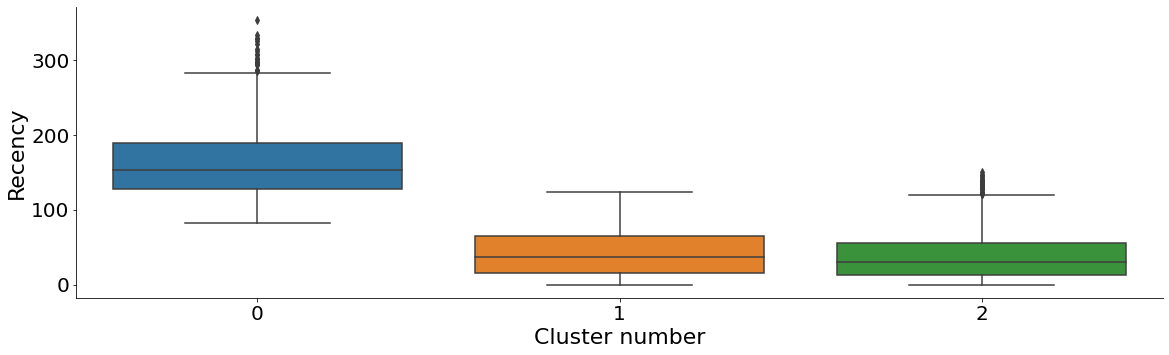

In [67]:
ax=sns.catplot(x="Cluster number", y="Recency", kind="box", data=df_analysis)
ax.fig.set_figwidth(20)
ax.fig.set_figheight(5)

In [68]:
def cluster_props(df,i):
    df_rq=df[df["Cluster number"]==i]
    return df_rq[['Profit','Recency','Count','online_order']].describe()

In [69]:
cluster_props(df_cluster,0)

Profit     Recency       Count  online_order
count   567.000000  567.000000  567.000000    567.000000
mean   1872.557249  164.444444    3.641975      1.813051
std    1171.450465   51.555384    1.568417      1.215465
min      15.080000   82.000000    1.000000      0.000000
25%     902.575000  127.000000    2.000000      1.000000
50%    1791.150000  153.000000    4.000000      2.000000
75%    2652.225000  189.500000    5.000000      3.000000
max    5880.330000  353.000000    8.000000      6.000000

In [70]:
cluster_props(df_cluster,1)

Profit      Recency        Count  online_order
count  1736.000000  1736.000000  1736.000000   1736.000000
mean   2311.298105    42.010369     4.844470      2.374424
std     982.071102    29.897653     1.434046      1.308942
min      35.740000     0.000000     1.000000      0.000000
25%    1623.990000    16.000000     4.000000      1.000000
50%    2323.540000    37.000000     5.000000      2.000000
75%    2990.800000    65.000000     6.000000      3.000000
max    5407.150000   124.000000     9.000000      6.000000

In [71]:
cluster_props(df_cluster,2)

Profit      Recency        Count  online_order
count   1109.000000  1109.000000  1109.000000   1109.000000
mean    5021.805870    38.130748     8.149684      4.000902
std     1414.392751    31.875775     1.684274      1.628658
min     2008.270000     0.000000     4.000000      0.000000
25%     4050.110000    13.000000     7.000000      3.000000
50%     4809.950000    30.000000     8.000000      4.000000
75%     5763.130000    56.000000     9.000000      5.000000
max    11668.950000   150.000000    14.000000      9.000000

## Assigning new customers into cluster groups

In [72]:
df_newcust['Cluster number']=''
df_newcust.loc[np.array_split(df_newcust, 3)[0].index,'Cluster number']=2
df_newcust.loc[np.array_split(df_newcust, 3)[1].index,'Cluster number']=1
df_newcust.loc[np.array_split(df_newcust, 3)[2].index,'Cluster number']=0

In [73]:
df_newcust[df_newcust['Cluster number']==0]

first_name  last_name  gender  past_3_years_bike_related_purchases  \
477      Sibby    Skinner  Female                                   25   
478      Selle     Casper  Female                                   98   
479     Andrew    Froment    Male                                   58   
480   Maurizia   Ritmeyer  Female                                   95   
481     Keenan   Moriarty    Male                                   67   
..         ...        ...     ...                                  ...   
710  Ferdinand  Romanetti    Male                                   60   
711       Burk    Wortley    Male                                   22   
712   Melloney      Temby  Female                                   17   
713     Dickie    Cubbini    Male                                   30   
714      Sylas    Duffill    Male                                   56   

           DOB                     job_title job_industry_category  \
477 1981-05-05                 Accountant IV         Manufacturing   
478 1978-03-27                 Social Worker                Health   
479 1977-07-19           Office Assistant IV                Retail   
480 1980-04-09                       Teacher         Entertainment   
481 1994-12-23                       Actuary    Financial Services   
..         ...                           ...                   ...   
710 1959-10-07                     Paralegal    Financial Services   
711 2001-10-17        Senior Sales Associate                Health   
712 1954-10-05  Budget/Accounting Analyst IV    Financial Services   
713 1952-12-17             Financial Advisor    Financial Services   
714 1955-10-02           Staff Accountant IV              Property   

        wealth_segment deceased_indicator owns_car  ...  online_order  Rank  \
477      Mass Customer                  N      Yes  ...             0   682   
478      Mass Customer                  N      Yes  ...             3   684   
479     High Net Worth                  N       No  ...             4   684   
480      Mass Customer                  N      Yes  ...             6   684   
481      Mass Customer                  N      Yes  ...             2   684   
..                 ...                ...      ...  ...           ...   ...   
710  Affluent Customer                  N       No  ...             0   996   
711      Mass Customer                  N       No  ...             6   997   
712  Affluent Customer                  N      Yes  ...             2   997   
713      Mass Customer                  N      Yes  ...             0   997   
714      Mass Customer                  N      Yes  ...             2  1000   

     Value   Age Age group  gender_binary  ownscar_binary  \
477  0.700  40.0         3            0.0               1   
478  0.700  43.0         3            0.0               1   
479  0.700  43.0         3            1.0               0   
480  0.700  41.0         3            0.0               1   
481  0.700  26.0         2            1.0               1   
..     ...   ...       ...            ...             ...   
710  0.374  61.0         5            1.0               0   
711  0.357  19.0         1            1.0               0   
712  0.357  66.0         6            0.0               1   
713  0.357  68.0         6            1.0               1   
714  0.340  65.0         6            1.0               1   

     property_valuation_group  past purchase group  Cluster number  
477                         2                    1               0  
478                         1                    4               0  
479                         1                    3               0  
480                         1                    4               0  
481                         2                    3               0  
..                        ...                  ...             ...  
710                         2                    3               0  
711                         4           

## Correlation between variables

## Categorical vs. categorical

In [74]:
# #chi-square test
# from scipy.stats import chi2_contingency
# chi2_check = []
# categorical_columns=['state','property_valuation_group','gender_binary','past purchase group',
#           'wealth_segment','ownscar_binary','Age group']
# for i in categorical_columns:
#     if chi2_contingency(pd.crosstab(df_cluster['Cluster number'], df_cluster[i]))[1] < 0.1:
#         chi2_check.append('Reject Null Hypothesis')
#     else:
#         chi2_check.append('Fail to Reject Null Hypothesis')
# res = pd.DataFrame(data = [categorical_columns, chi2_check] 
#              ).T 
# res.columns = ['Column', 'Hypothesis']
# print(res)

## Continuous vs. categorical

In [75]:
# #ANOVA test
# from sklearn.feature_selection import f_classif
# X=df_cluster[['postcode','online_order']]
# f_score=f_classif(X,df_cluster['Cluster number'])
# f_value=pd.Series(f_score[0], index=X.columns)
# f_value.sort_values(ascending=False,inplace=True)
# print(f_value)

## Train-test split

In [76]:
X_train=df_analysis[['state', 'gender_binary','wealth_segment','ownscar_binary','Age group','property_valuation_group',
                   'past purchase group','online_order']]

#Each category in categorical attribute converted to dummy variable
X_train=pd.get_dummies(X_train, prefix=['state','wealth_segment'],columns=['state','wealth_segment'])

X_test=df_newcust[['state', 'gender_binary','wealth_segment','ownscar_binary','Age group','property_valuation_group',
                   'past purchase group','online_order']]

#Each category in categorical attribute converted to dummy variable
X_test=pd.get_dummies(X_test, prefix=['state','wealth_segment'],columns=['state','wealth_segment'])

In [77]:
y_train=df_analysis['Cluster number']
y_test=df_newcust['Cluster number']

## Scaling

In [78]:
scaler=MinMaxScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled=pd.DataFrame(scaler.fit_transform(X_test))

## Select and train a model

In [79]:
class_names=np.sort(df_cluster['Cluster number'].unique())

In [80]:
#Cross-validation
def cross_val(model_name,model_input):
    
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import plot_confusion_matrix
    
    model=model_input
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_train_scaled)
    train_acc=accuracy_score(y_train, predictions)
    
    #Cross-validation
    scores = cross_val_score(model, X_train_scaled, y_train, cv=3)
    
    print("Accuracy on whole training set:", train_acc)
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, X_train_scaled, y_train,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)

Accuracy on whole training set: 0.727432590855803
Scores: [0.5026362  0.50395778 0.52770449]
Mean: 0.5114328243319067
Standard deviation: 0.01151844494314436


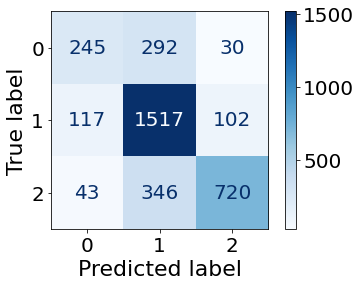

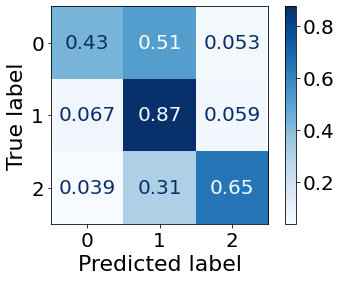

In [81]:
from sklearn.tree import DecisionTreeClassifier
tree_reg=DecisionTreeClassifier(max_depth=10,random_state=42)
cross_val('tree_reg',tree_reg)

# Fine-tune the model

In [82]:
#Grid Search method was used to search through a manually specified subset of the hyperparameter space
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import joblib
from sklearn.metrics import r2_score

def fine_tune(params,model,name):
    
    grid_search_cv = GridSearchCV(model, params, verbose=1, cv=3,refit=True, return_train_score=True)
    grid_search_cv.fit(X_train_scaled, y_train)
    best_mod=grid_search_cv.best_estimator_
    best_score=grid_search_cv.best_score_
    cvres = grid_search_cv.cv_results_
    
    for mean_score,mean_train_score, params in zip(cvres["mean_test_score"], cvres["mean_train_score"], cvres["params"]):
        print(mean_score, mean_train_score, params)
    
    joblib.dump(best_mod, name)
    
    return best_mod, best_score

In [83]:
params_dt = [{'max_depth': [4,6,8,10],'min_samples_leaf': [1,3,5]}]
fine_tune(params_dt,DecisionTreeClassifier(),'DT')

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6008197916489554 0.6115180041301413 {'max_depth': 4, 'min_samples_leaf': 1}
0.6008197916489554 0.6110783792577988 {'max_depth': 4, 'min_samples_leaf': 3}
0.6008197916489554 0.6110783792577988 {'max_depth': 4, 'min_samples_leaf': 5}
0.5785435727170288 0.6310079542269516 {'max_depth': 6, 'min_samples_leaf': 1}
0.5820613450023933 0.6317408771234628 {'max_depth': 6, 'min_samples_leaf': 3}
0.5811836408518084 0.6314477723976405 {'max_depth': 6, 'min_samples_leaf': 5}
0.5483512712670008 0.6787801585690767 {'max_depth': 8, 'min_samples_leaf': 1}
0.5518700740239244 0.6740911272837394 {'max_depth': 8, 'min_samples_leaf': 3}
0.5524595037558112 0.6666176333194803 {'max_depth': 8, 'min_samples_leaf': 5}
0.5155348739913617 0.7604043801405278 {'max_depth': 10, 'min_samples_leaf': 1}
0.5202209434070172 0.7205452946350044 {'max_depth': 10, 'min_samples_leaf': 3}
0.5269620307296924 0.6912366906034452 {'max_depth': 10, 'min_samples_leaf': 5}


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.5s finished


(DecisionTreeClassifier(max_depth=4), 0.6008197916489554)

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
model_name='DT'
loaded_model = joblib.load(model_name)
final_predictions=loaded_model.predict(X_test_scaled)
test_acc=accuracy_score(y_test.astype(int), final_predictions)
test_acc

0.5118881118881119

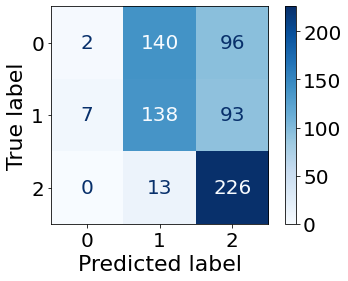

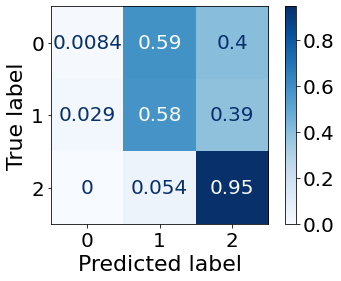

In [85]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
        disp = plot_confusion_matrix(loaded_model, X_test_scaled, y_test.astype(int),
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)

## Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 715 points : 342


In [87]:
test_acc=accuracy_score(y_test.astype(int), y_pred)
test_acc

0.5216783216783217

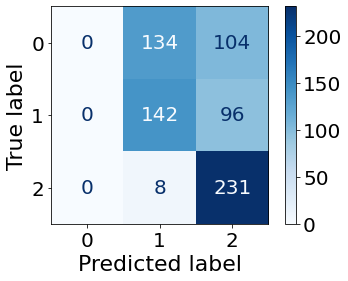

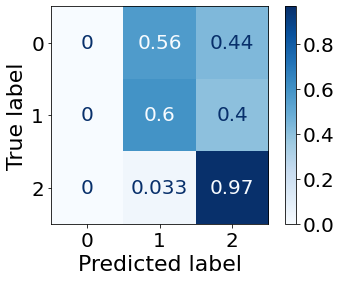

In [88]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
        disp = plot_confusion_matrix(gnb, X_test, y_test.astype(int),
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)